# Electric Machinery Fundamentals 5th edition
## Chapter 3 (Code examples)

## Example 3-1
**Calculate the net magetic field produced by a three-phase stator.**

Import the PyLab namespace (provides set of useful commands and constants like $\pi$)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set up the basic conditions:

In [2]:
bmax = 1           # Normalize bmax to 1
freq = 60          # 60 Hz
w = 2*pi*freq      # angluar velocity (rad/s)

First, generate the three component magnetic fields

In [3]:
t = linspace(0, 1./60, 100)   # 100 values for one period
Baa = sin(w*t) * (cos(0) + 1j*sin(0))
Bbb = sin(w*t-2*pi/3) * (cos(2*pi/3) + 1j*sin(2*pi/3))
Bcc = sin(w*t+2*pi/3) * (cos(-2*pi/3) + 1j*sin(-2*pi/3))

Calculate `Bnet`:

In [4]:
Bnet = Baa + Bbb + Bcc

Calculate a circle representing the expected maximum value of `Bnet`:

In [5]:
circle = 1.5 * (cos(w*t) + 1j*sin(w*t))

Plot the magnitude and direction of the resulting magnetic fields.  Note that `Baa` is black, `Bbb` is blue, `Bcc` is magneta, and `Bnet` is red.

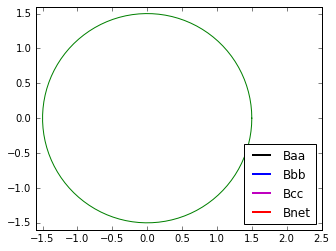

In [6]:
# First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(xlim=(-1.6, 2.5), ylim=(-1.6, 1.6), aspect='equal')
laa, lbb, lcc, lnet = ax.plot([], [], 'k',  # black
                              [], [], 'b',  # blue
                              [], [], 'm',  # magenta
                              [], [], 'r',  # red
                              lw=2)
ax.legend(('Baa', 'Bbb', 'Bcc', 'Bnet'), loc=4)

# initialization function: plot the background of each frame
def init():
    ax.plot(real(circle), imag(circle), 'g');
    return

# animation function.  This is called sequentially
def animate(i):
    laa.set_data([0, real(Baa[i])], [0, imag(Baa[i])])
    lbb.set_data([0, real(Bbb[i])], [0, imag(Bbb[i])])
    lcc.set_data([0, real(Bcc[i])], [0, imag(Bcc[i])])
    lnet.set_data([0, real(Bnet[i])], [0, imag(Bnet[i])])
    return laa, lbb, lcc, lnet

from matplotlib import animation

# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=50);

If run "normally" (and not in "inline" mode like we are doing here) the command above would have opened a window with the animation running.
On the server we can only run "inline" mode but there is a solution to simply generate the animation as a video and embed it right here:

In [7]:
from IPython.display import HTML
HTML(anim.to_html5_video())

For a more advanced animation you can go to [Ch3-Animation_ThreePhaseFluxes_inline.ipynb](Ch3-Animation_ThreePhaseFluxes_inline.ipynb).